# Regression - Engineering

## Feature Engineering

As we saw before, linear regression has to work on pure mathematical matrices of real numbers, respecting the normal equation:

$$\beta = (X^T X)^{-1}X^Ty$$

This means data that doesn't fit a matrix of real numbers has to be formatted to columns of real numbers (one per observation) so that we can ingest it into the $X$ matrix. This process is called **Feature Engineering**.

## Categorical Variables

If you have a categorical variable (can take one of many values), the standard way to encode it to a matrix form is [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) (OHE --- AKA dummy variables). 

![](../assets/mtimFxh.png)

This can be done using `pd.get_dummies`:

In [2]:
import pandas as pd 
data = pd.DataFrame({'Color':['red','blue','yellow','yellow','red']})

In [3]:
# get dummies
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = sns.load_dataset('titanic')
df['class'].unique()


['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [4]:
df 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
pd.get_dummies(df['class'])

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


### Caveats of one-hot encoding

First, you need to drop one of the columns of the OHE matrix otherwise that matrix has full rank (at least one of the columns can be made as a combination from the others). 

Remember from lecture 3.1 how this causes a problem.

This can be fixed with the drop parameter in pd.get_dummies:

In [6]:
# hot encoding

pd.get_dummies(df['class'],drop_first=True)

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


Second, if a class is always there (columns of ones) or never there (column of zeroes) this also doesn't have full rank. Note `[0]` is any other column times 0 and `[1]` is 1 + any other column times 0)

## Interpreting 

The coefficient of a OHE variable is the effeect of being in that category compared to being in the dropped category.

For instance, let's predict how much people paid per gender:

In [7]:
# interpreting - one
import statsmodels.api as sm 

sm.OLS(df.fare,sm.add_constant(pd.get_dummies(df.sex,drop_first=True))).fit(cov_type='HC2').summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     25.78
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.66e-07
Time:                        18:52:07   Log-Likelihood:                -4728.8
No. Observations:                 891   AIC:                             9462.
Df Residuals:                     889   BIC:                             9471.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4798      3.273     13.590      0.000      38.065      50.895
male         -18.9559      3.733     -5.077      0.000     -26.273     -11.639
==============================================================================
Omnibus:                      918.036   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49432.048
Skew:                           4.857   Prob(JB):                         0.00
Kurtosis:                      38.173   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [8]:
# interpreting - two

sm.OLS(df.fare, sm.add_constant(pd.get_dummies(df['class'],drop_first=True))).fit(cov_type='HC2').summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.13e-40
Time:                        18:52:07   Log-Likelihood:                -4549.9
No. Observations:                 891   AIC:                             9106.
Df Residuals:                     888   BIC:                             9120.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.1547      5.333     15.780      0.000      73.702      94.607
Second       -63.4925      5.424    -11.706      0.000     -74.123     -52.862
Third        -70.4791      5.360    -13.150      0.000     -80.984     -59.975
==============================================================================
Omnibus:                      975.994   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85099.055
Skew:                           5.174   Prob(JB):                         0.00
Kurtosis:                      49.746   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

## Predicted component

Linear models are easy to interpret predictively. You add the coefficients with the feature values associated to get the prediction:

From this model we would predict a second class fare to be `84 - 63 = 21` dollars.

### Using OHE to fix features

There are many ways a feature can have problems. For instance, imagine the `fare` was registered as `50+` for all fares above $50:

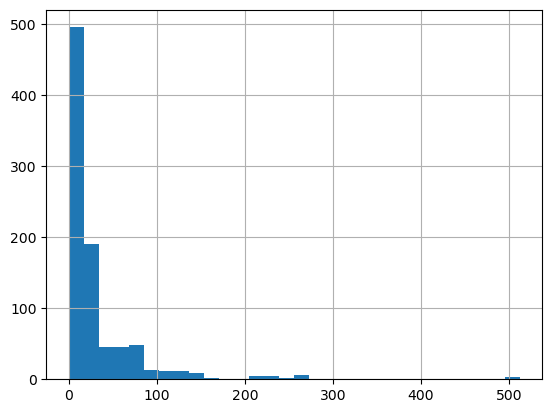

In [9]:
df.fare.hist(bins=30);

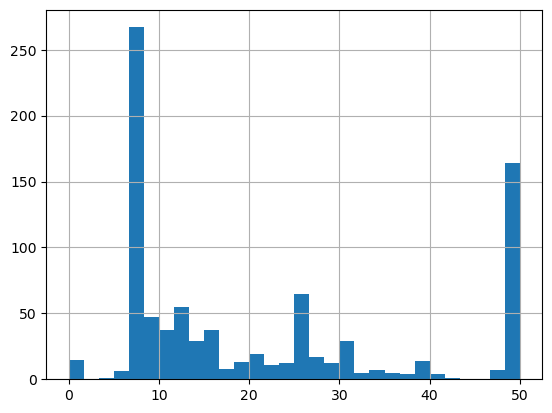

In [10]:
df.loc[df.fare > 50, 'fare'] = 50
df.fare.hist(bins=30); #more normal distribution - continuous values can cause issues in the data distribution 

If we were using something like fare to predict age, it would break the asumptions of linear regression and the coefficient would be invalid (both to interpret and to predict/test).

We can enhance the regression by adding a categorical for the "clipped" fares:

In [11]:
# Note the astype int to cast the bool to a number

df['clipped_fare'] = (df.fare >= 50).astype(int) 
df = df.dropna().reset_index(drop=True)

sm.OLS(df.age,sm.add_constant(df[['fare','clipped_fare']])).fit(cov_type='HC2').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                    0.9728
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.380
Time:                        18:52:08   Log-Likelihood:                -757.33
No. Observations:                 182   AIC:                             1521.
Df Residuals:                     179   BIC:                             1530.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.1594      4.118      7.323      0.000      22.088      38.231
fare             0.2534      0.182      1.395      0.163      -0.103       0.610
clipped_fare    -7.6259      5.934     -1.285      0.199     -19.256       4.004
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.553
Skew:                          -0.078   Prob(JB):                        0.758
Kurtosis:                       2.780   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

## Polynomial Coefficients

We saw polynomial coefficients before, and we saw that we can (ab)use them to overfit to any dataset (by [Taylor's theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem)) -- usually we restrict ourselves to degree 3 or lower.

In [12]:
df['fare2'] = (df.fare ** 2) #square fare 


y = df.age
X = df[['fare','fare2']]
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()

#sm.OLS(df.age,sm.add_constant(df[['fare','fare2']])).fit(cov_type='HC2').summary()

# Here we have 1x - 0.01x^2 so the prediction of this would be the parabola through that equation.
# These parabolas are sometimes iffy to predict far outside values of `x` seen in the model training data.
# They end up curving downwards or upwards severely at some point:

# Multicollinearity will be present here with polynomial features
# Although orthogonal polynomials can reduce the correlation, 
# generally, we care more about the fitted regression function as a whole


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.444
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0897
Time:                        18:52:08   Log-Likelihood:                -755.77
No. Observations:                 182   AIC:                             1518.
Df Residuals:                     179   BIC:                             1527.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4379      6.159      3.643      0.000      10.366      34.510
fare           1.0556      0.479      2.204      0.028       0.117       1.994
fare2         -0.0161      0.007     -2.147      0.032      -0.031      -0.001
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.658
Skew:                          -0.107   Prob(JB):                        0.720
Kurtosis:                       2.799   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

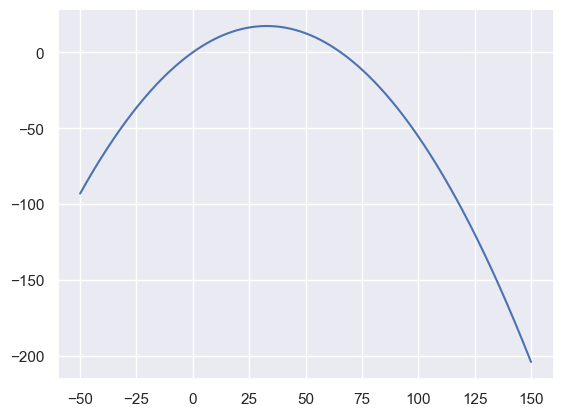

In [13]:
# plot

import matplotlib.pyplot as plot
sns.set()

x = np.linspace(-50,150,1000)
y = 1.0556*x - 0.0161 * (x**2)

plt.plot(x,y);


## Interaction Variables

If you multiply coefficients together, they create "interaction" variable. For instance we can do this with gender and class:

In [14]:
# interaction

df['gender_class'] = df.sex.astype(str) + "_" + df['class'].astype(str)

X = pd.get_dummies(df.gender_class,drop_first=True)
X = sm.add_constant(X)
y = df.fare

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     244.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.10e-77
Time:                        18:52:08   Log-Likelihood:                -673.03
No. Observations:                 182   AIC:                             1358.
Df Residuals:                     176   BIC:                             1377.
Df Model:                           5                                         
Covariance Type:                  HC2                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            47.5558      0.793     59.947      0.000      46.001      49.111
female_Second   -32.6901      3.153    -10.369      0.000     -38.869     -26.511
female_Third    -34.1958      1.620    -21.112      0.000     -37.370     -31.021
male_First       -6.7353      1.582     -4.257      0.000      -9.836      -3.634
male_Second     -23.7433      4.084     -5.813      0.000     -31.748     -15.738
male_Third      -38.8608      1.236    -31.434      0.000     -41.284     -36.438
==============================================================================
Omnibus:                       56.907   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.759
Skew:                          -1.412   Prob(JB):                     2.98e-28
Kurtosis:                       5.956   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clipped_fare,fare2,gender_class
0,1,1,female,38.0,1,0,50.00,C,First,woman,False,C,Cherbourg,yes,False,1,2500.0000,female_First
1,1,1,female,35.0,1,0,50.00,S,First,woman,False,C,Southampton,yes,False,1,2500.0000,female_First
2,0,1,male,54.0,0,0,50.00,S,First,man,True,E,Southampton,no,True,1,2500.0000,male_First
3,1,3,female,4.0,1,1,16.70,S,Third,child,False,G,Southampton,yes,False,0,278.8900,female_Third
4,1,1,female,58.0,0,0,26.55,S,First,woman,False,C,Southampton,yes,True,0,704.9025,female_First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,50.00,S,First,woman,False,D,Southampton,yes,False,1,2500.0000,female_First
178,0,1,male,33.0,0,0,5.00,S,First,man,True,B,Southampton,no,True,0,25.0000,male_First
179,1,1,female,56.0,0,1,50.00,C,First,woman,False,C,Cherbourg,yes,False,1,2500.0000,female_First
180,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,0,900.0000,female_First




You can also do it a category and a continuous variable to capture the continuous variable's trend in that category:

In [16]:
# Note the astype int to cast the bool to a number

df['fare_male'] = df.fare * (df.sex == 'male') # fare becomes 0 when female bc False = 0 

X = df[['fare','fare2','fare_male']]
X = sm.add_constant(X)

y = df.age

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()

# Here `fare_male` is the effect of the fare when male specifically.
# So `fare` is for women specifically by omission and fare2 is for both groups.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.923
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0354
Time:                        18:52:08   Log-Likelihood:                -754.00
No. Observations:                 182   AIC:                             1516.
Df Residuals:                     178   BIC:                             1529.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4996      5.974      3.934      0.000      11.791      35.208
fare           0.8740      0.476      1.835      0.066      -0.059       1.807
fare2         -0.0138      0.007     -1.851      0.064      -0.028       0.001
fare_male      0.1028      0.054      1.893      0.058      -0.004       0.209
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.851
Skew:                          -0.154   Prob(JB):                        0.653
Kurtosis:                       2.867   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clipped_fare,fare2,gender_class,fare_male
0,1,1,female,38.0,1,0,50.00,C,First,woman,False,C,Cherbourg,yes,False,1,2500.0000,female_First,0.0
1,1,1,female,35.0,1,0,50.00,S,First,woman,False,C,Southampton,yes,False,1,2500.0000,female_First,0.0
2,0,1,male,54.0,0,0,50.00,S,First,man,True,E,Southampton,no,True,1,2500.0000,male_First,50.0
3,1,3,female,4.0,1,1,16.70,S,Third,child,False,G,Southampton,yes,False,0,278.8900,female_Third,0.0
4,1,1,female,58.0,0,0,26.55,S,First,woman,False,C,Southampton,yes,True,0,704.9025,female_First,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,50.00,S,First,woman,False,D,Southampton,yes,False,1,2500.0000,female_First,0.0
178,0,1,male,33.0,0,0,5.00,S,First,man,True,B,Southampton,no,True,0,25.0000,male_First,5.0
179,1,1,female,56.0,0,1,50.00,C,First,woman,False,C,Cherbourg,yes,False,1,2500.0000,female_First,0.0
180,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,0,900.0000,female_First,0.0
